<a href="https://colab.research.google.com/github/zaitmi002/ict_final/blob/main/group3Imti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data=pd.read_csv('/content/cardio_train.csv')

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,normal,normal,no,no,active,0
1,1,20228,female,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,18857,female,165,64.0,130,70,well above normal,normal,no,no,not active,1
3,3,17623,male,169,82.0,150,100,normal,normal,no,no,active,1
4,4,17474,female,156,56.0,100,60,normal,normal,no,no,not active,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 6.9+ MB


In [ ]:
data.shape

(70000, 13)

In [ ]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
data.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [ ]:
data.describe()

,id,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414,0.499700
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530,0.500003
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


In [ ]:
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data['gender'] = label_encoder.fit_transform(data['gender'])
data['active'] = label_encoder.fit_transform(data['active'])
data['cholesterol'] = label_encoder.fit_transform(data['cholesterol'])
data['gluc'] = label_encoder.fit_transform(data['gluc'])
data['alco'] = label_encoder.fit_transform(data['alco'])
data['smoke'] = label_encoder.fit_transform(data['smoke'])

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,0,156,85.0,140,90,2,1,0,0,0,1
2,2,18857,0,165,64.0,130,70,2,1,0,0,1,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,0,1
4,4,17474,0,156,56.0,100,60,1,1,0,0,1,0


In [ ]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,1,168,76.0,120,80,1,1,1,0,0,0
69996,99995,22601,0,158,126.0,140,90,0,0,0,0,0,1
69997,99996,19066,1,183,105.0,180,90,2,1,0,1,1,1
69998,99998,22431,0,163,72.0,135,80,1,0,0,0,1,1
69999,99999,20540,0,170,72.0,120,80,0,1,0,0,0,0


In [ ]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

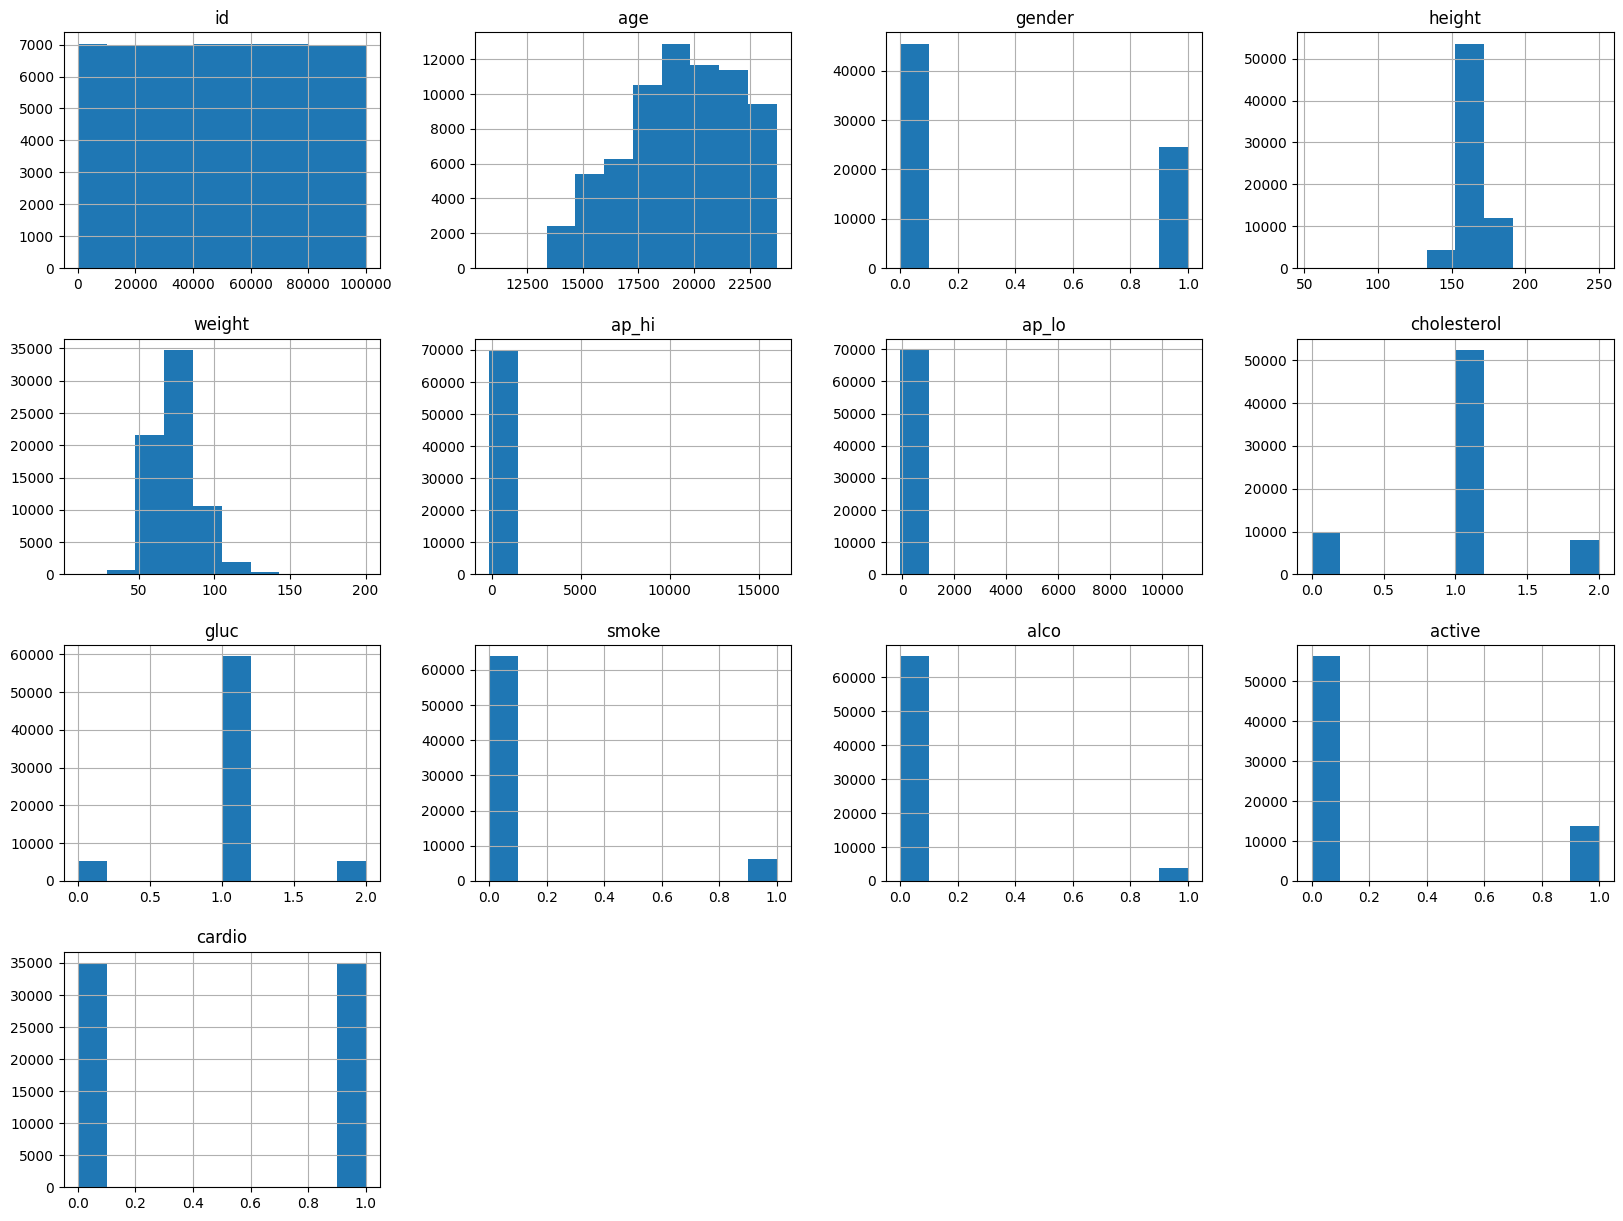

In [ ]:
freqgraph = data.select_dtypes(include=['float', 'int'])
freqgraph.hist(figsize=(20,15))
plt.show()

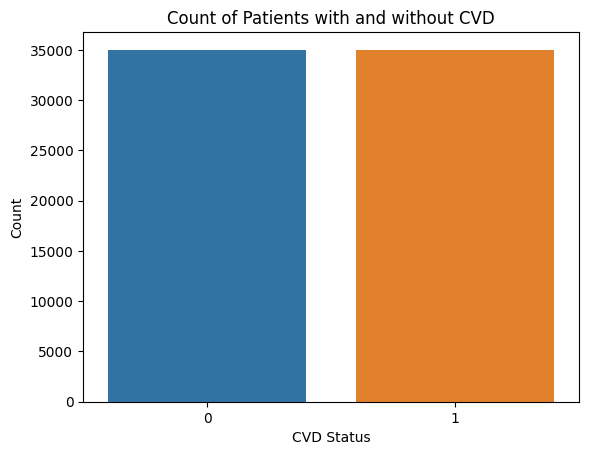

In [ ]:
sns.countplot(x='cardio', data=data)
plt.xlabel('CVD Status')
plt.ylabel('Count')
plt.title('Count of Patients with and without CVD')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

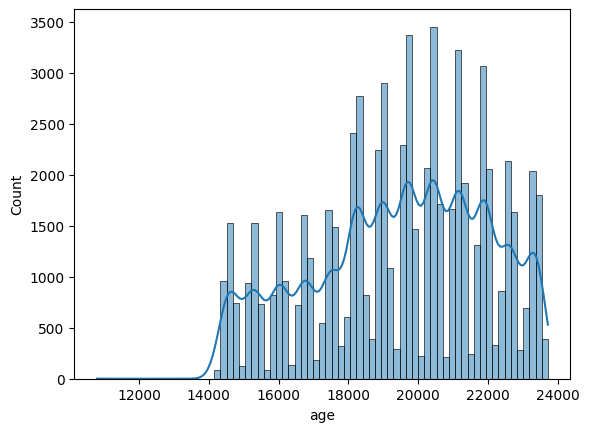

In [ ]:
sns.histplot(data.age,kde=True)

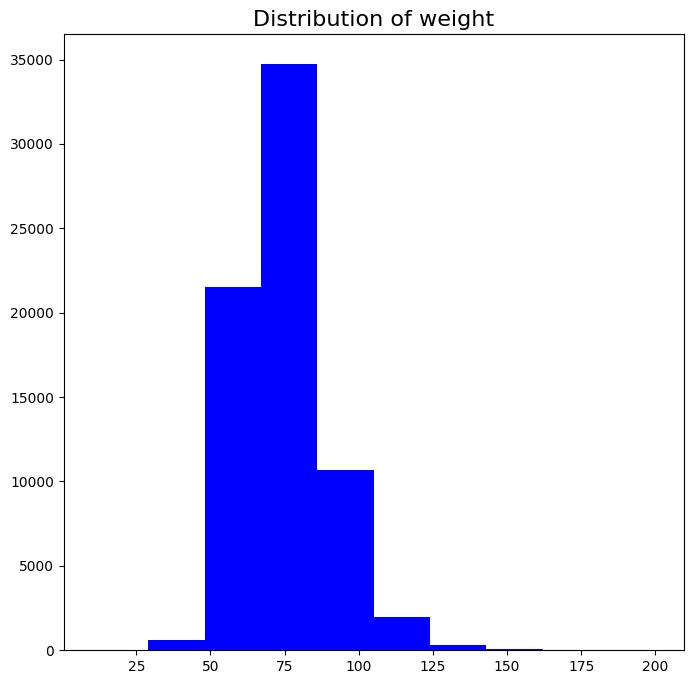

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(data['weight'],color='blue') # Changes the plot to red colour
plt.title('Distribution of weight',fontsize=16)
plt.xticks()
plt.yticks()
plt.show()

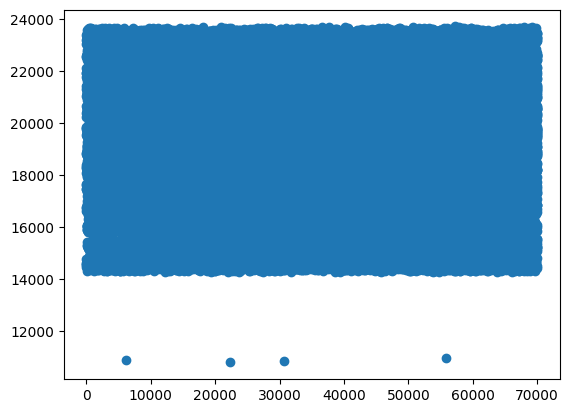

In [ ]:
plt.scatter(data.index,y=data['age'])

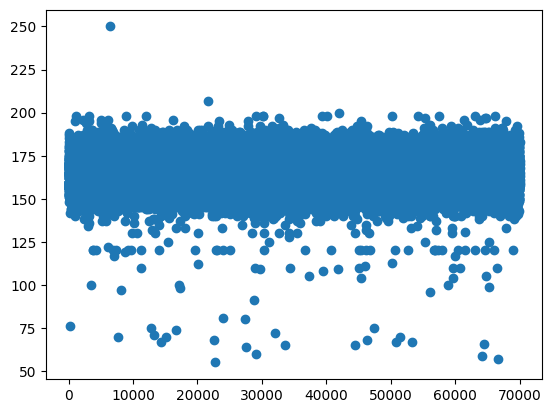

In [ ]:
plt.scatter(data.index,y=data['height'])

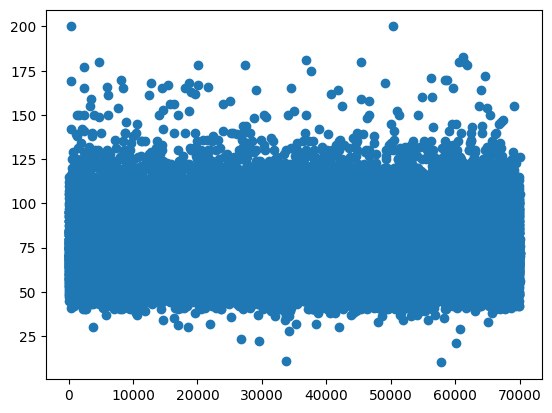

In [ ]:
plt.scatter(data.index,y=data['weight'])

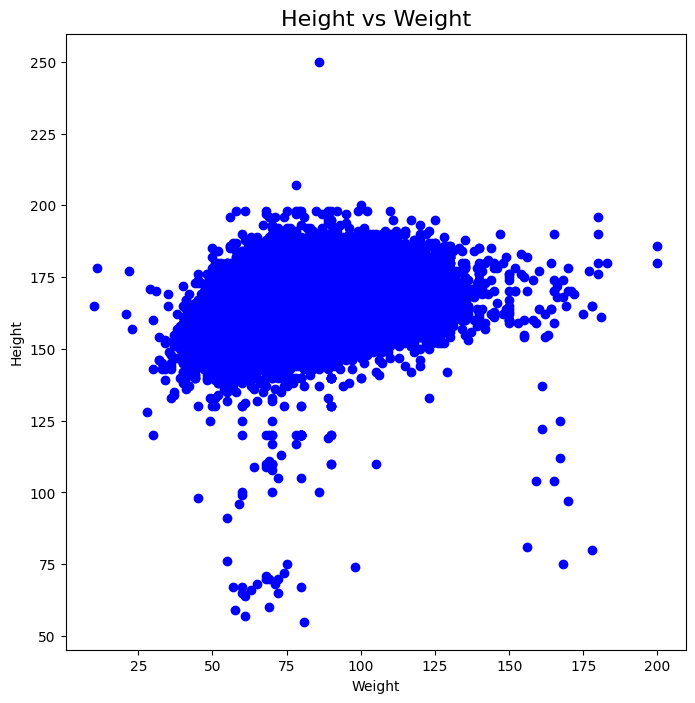

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(data['weight'], data['height'], color='blue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight', fontsize=16)
plt.xticks()
plt.yticks()
plt.show()


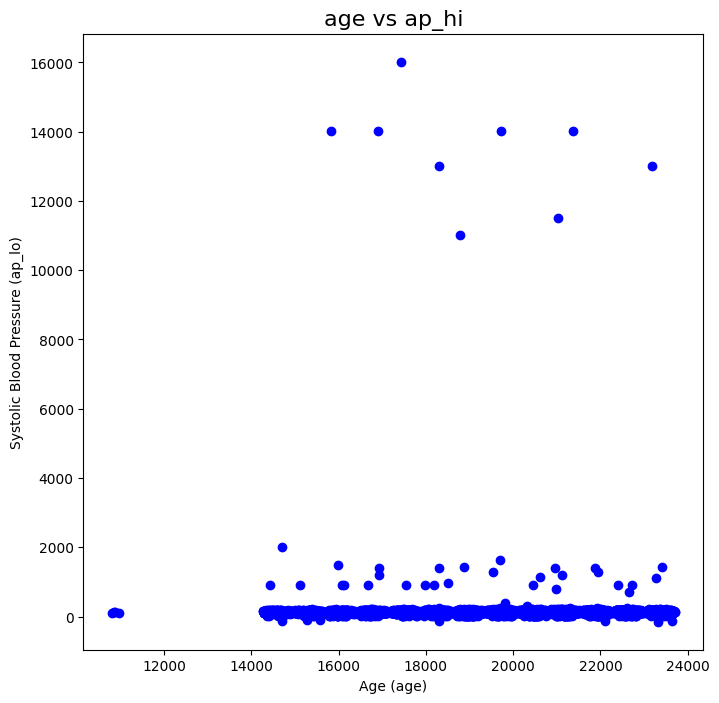

In [ ]:

plt.figure(figsize=(8, 8))
plt.scatter(data['age'], data['ap_hi'], color='blue')
plt.xlabel('Age (age)')
plt.ylabel('Systolic Blood Pressure (ap_lo)')
plt.title('age vs ap_hi', fontsize=16)
plt.xticks()
plt.yticks()
plt.show()


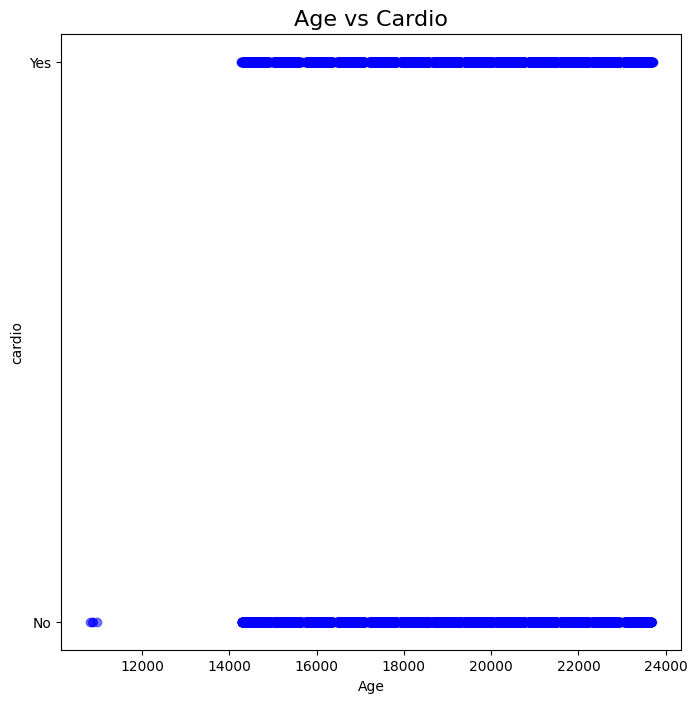

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(data['age'], data['cardio'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('cardio')
plt.title('Age vs Cardio', fontsize=16)
plt.xticks()
plt.yticks([0, 1], ['No', 'Yes'])  # Customizing y-axis tick labels
plt.show()


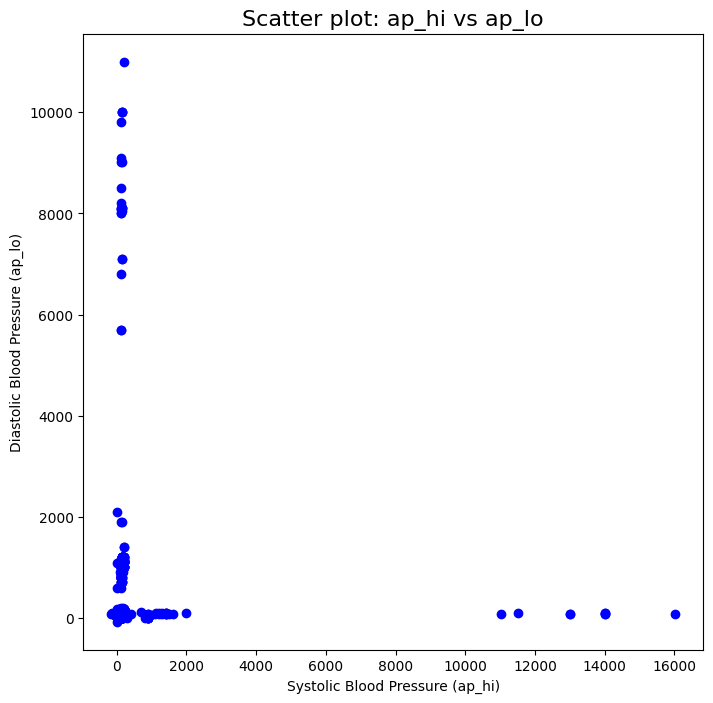

In [ ]:


plt.figure(figsize=(8, 8))
plt.scatter(data['ap_hi'], data['ap_lo'], color='blue')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.title('Scatter plot: ap_hi vs ap_lo', fontsize=16)
plt.xticks()
plt.yticks()
plt.show()


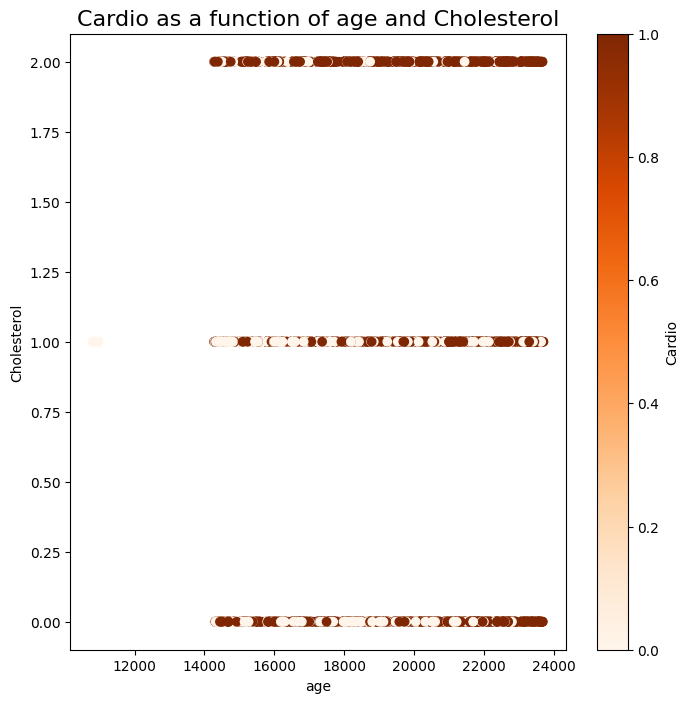

In [ ]:

plt.figure(figsize=(8, 8))
plt.scatter(data['age'], data['cholesterol'], c=data['cardio'], cmap='Oranges')
plt.xlabel('age')
plt.ylabel('Cholesterol')
plt.title('Cardio as a function of age and Cholesterol', fontsize=16)
plt.colorbar(label='Cardio')
plt.show()


In [ ]:
pd.crosstab(data.cardio, data.gender)

gender,0,1
cardio,,
0,22914,12107
1,22616,12363


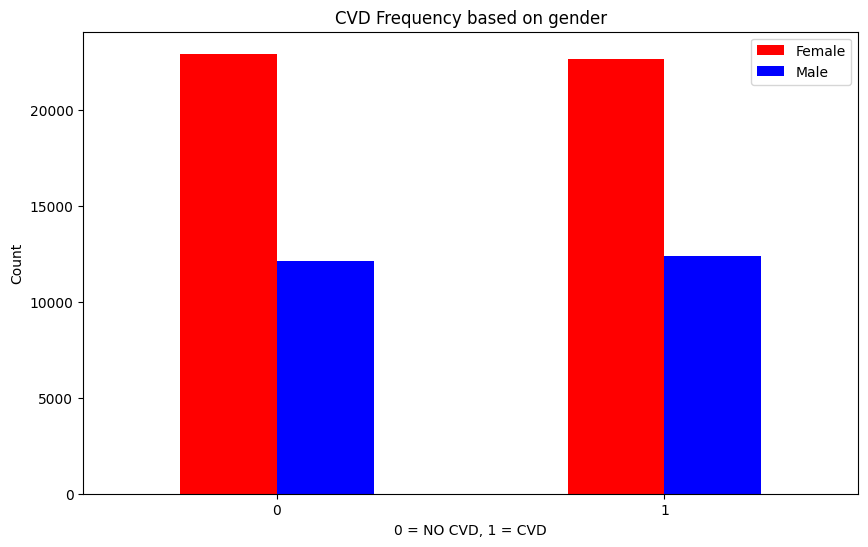

In [ ]:
pd.crosstab(data.cardio, data.gender).plot(kind="bar", figsize=(10,6), color=["red", "blue"]);
plt.title("CVD Frequency based on gender")
plt.xlabel("0 = NO CVD, 1 = CVD")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [ ]:
pd.crosstab(data.cholesterol, data.cardio)

cardio,0,1
cholesterol,,
0,3799,5750
1,29330,23055
2,1892,6174


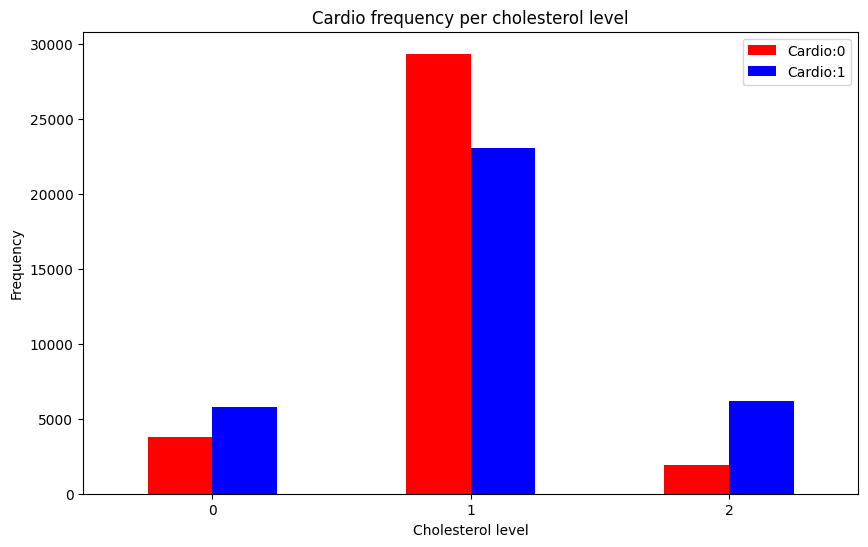

In [ ]:
pd.crosstab(data.cholesterol, data.cardio).plot(kind="bar", figsize=(10,6), color=["red", "blue"])
plt.title("Cardio frequency per cholesterol level")
plt.xlabel("Cholesterol level")
plt.ylabel("Frequency")
plt.legend(["Cardio:0", "Cardio:1"])
plt.xticks(rotation = 0);

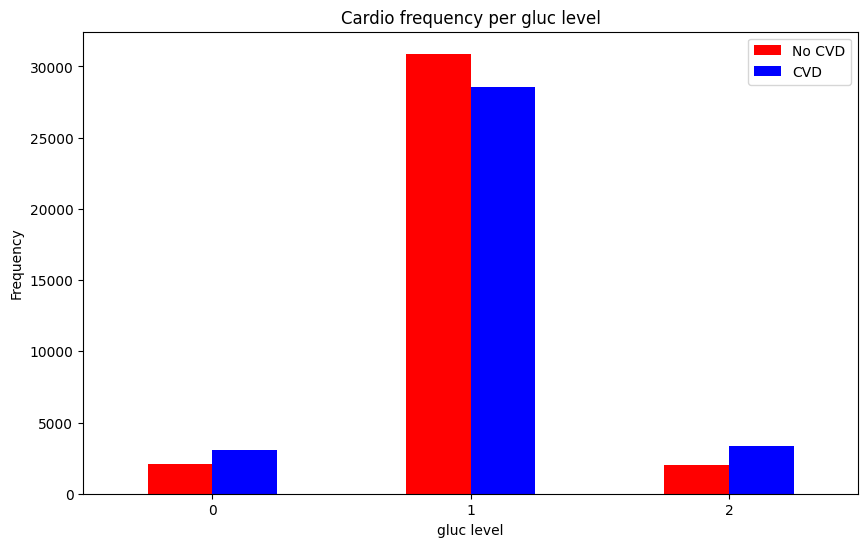

In [ ]:
pd.crosstab(data.gluc, data.cardio).plot(kind="bar", figsize=(10,6), color=["red", "blue"])
plt.title("Cardio frequency per gluc level")
plt.xlabel("gluc level")
plt.ylabel("Frequency")
plt.legend(["No CVD", "CVD"])
plt.xticks(rotation = 0);

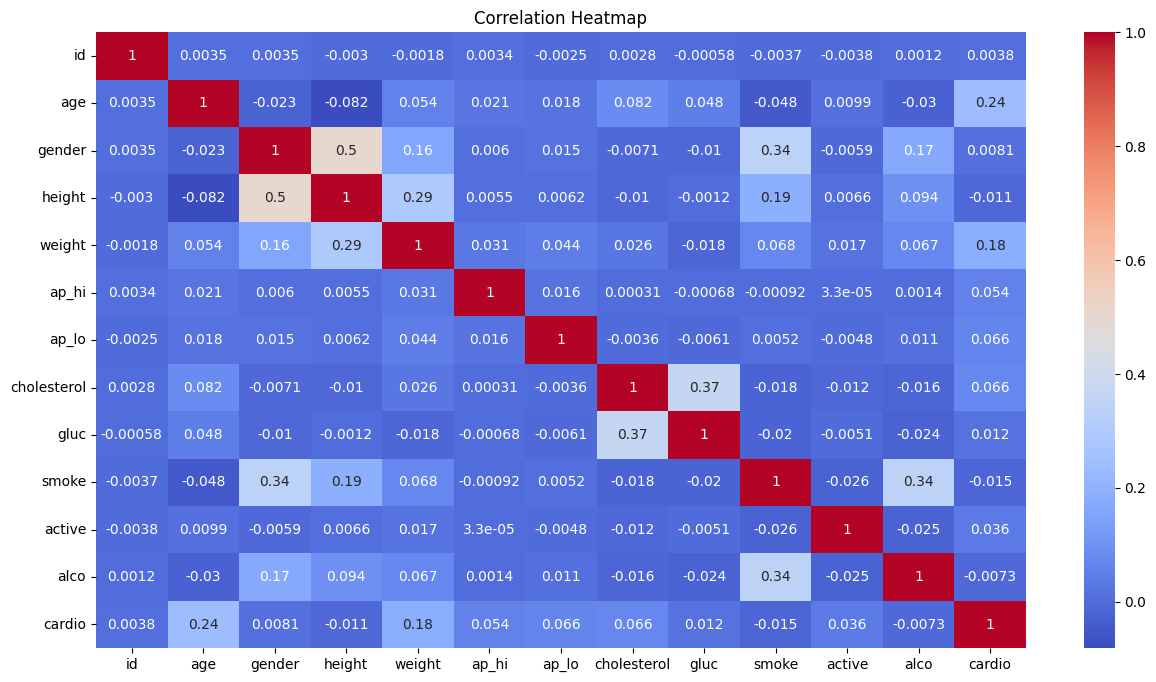

In [ ]:
heatmap_cols = ['id','age','gender','height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','active','alco','cardio']
heatmap_data = data[heatmap_cols]
plt.figure(figsize=(15, 8)) 
sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df = pd.DataFrame(data)
correlation_matrix = df.corr()
print(correlation_matrix)  

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.002834  0.082290 -0.007089 -0.010274  0.026419  0.000308   
gluc        -0.000582  0.047767 -0.010455 -0.001246 -0.017506 -0.000678   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active      -0.003755  0.009927 -0.005866  0.006570  0.016867  0.000033   
cardio       0.003799  0.

**Outlier**

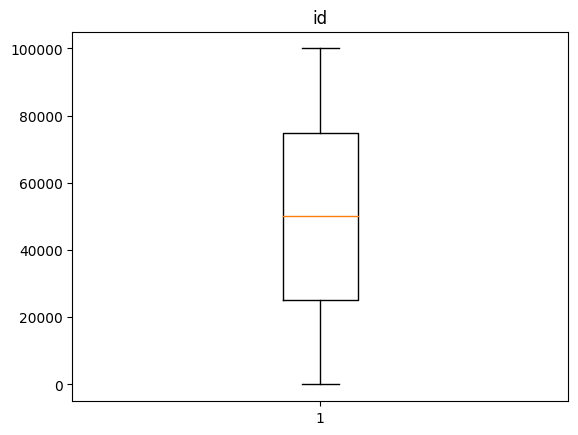

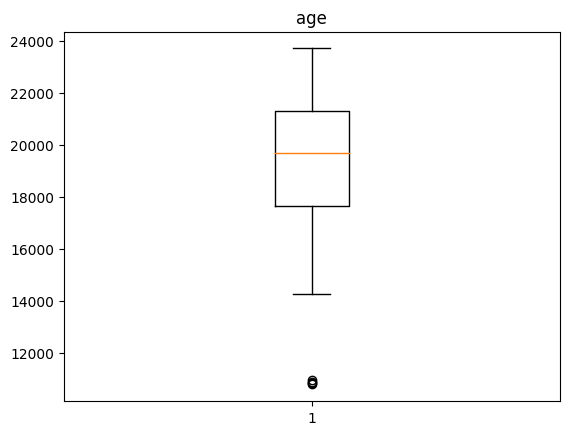

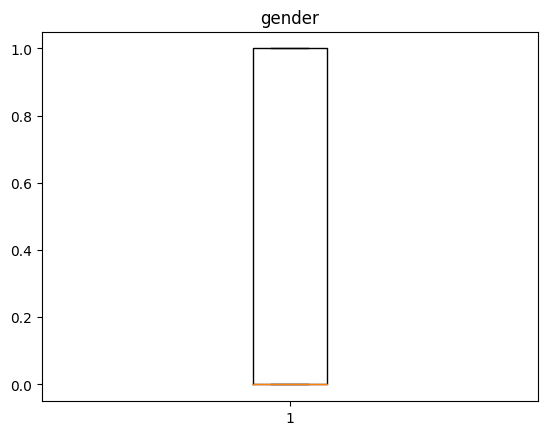

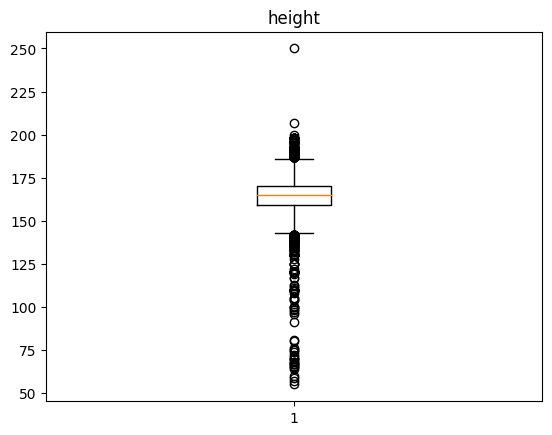

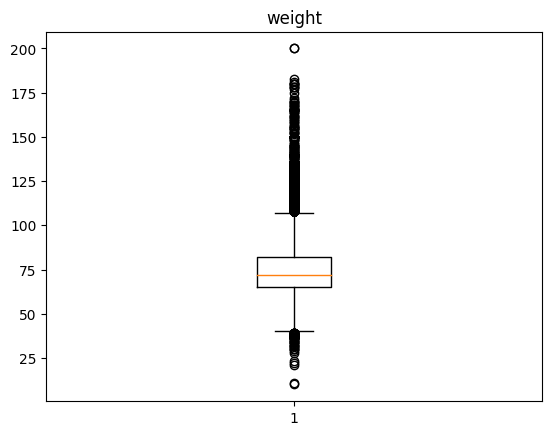

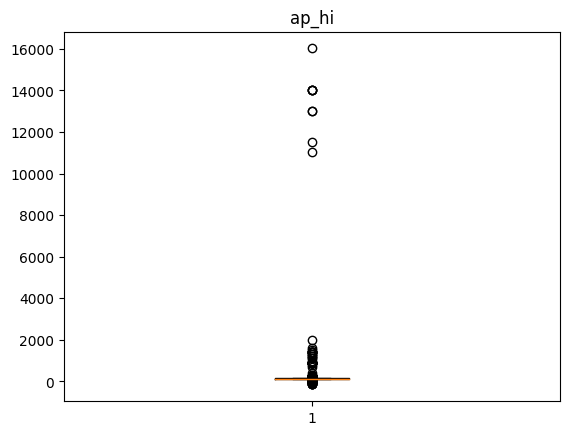

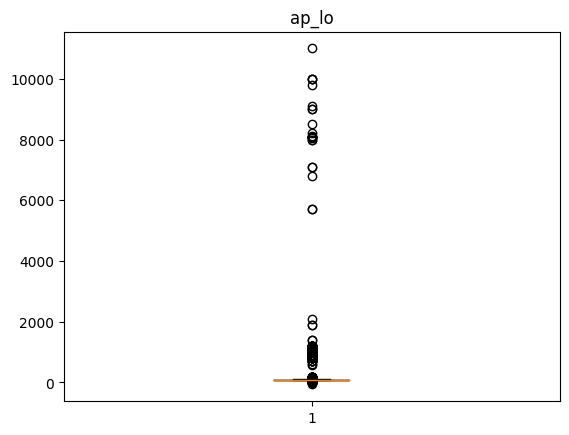

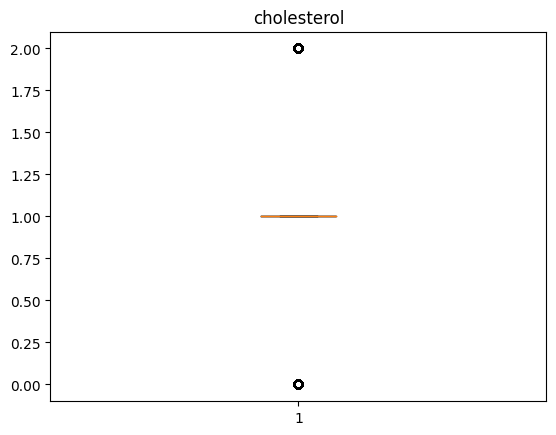

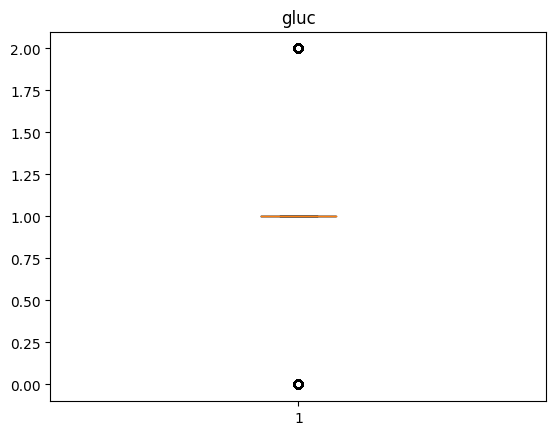

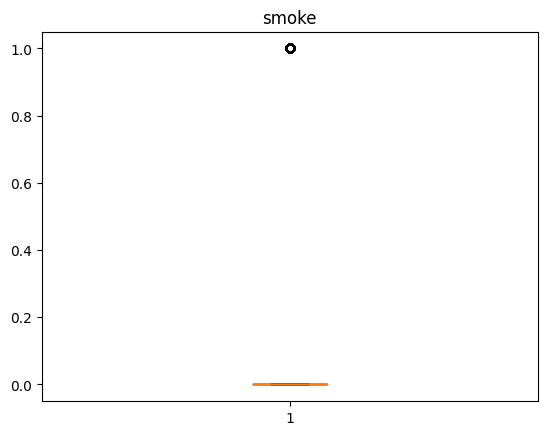

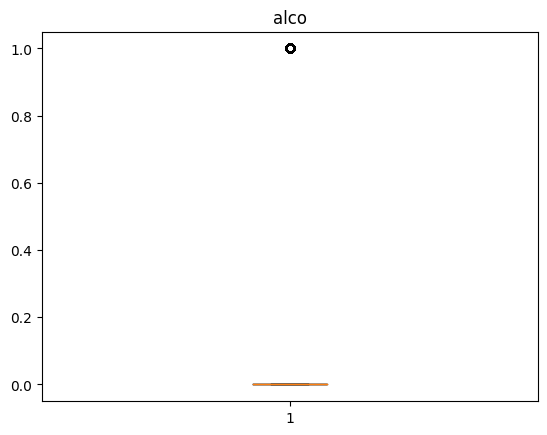

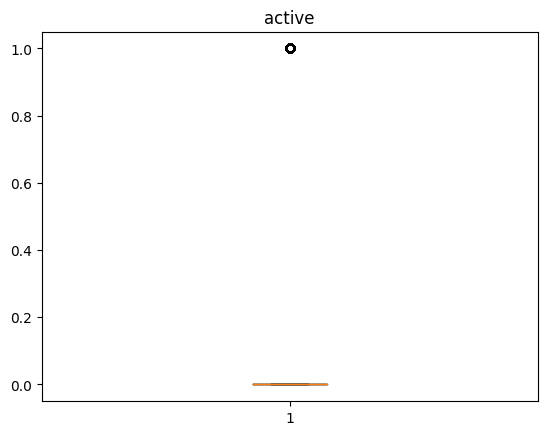

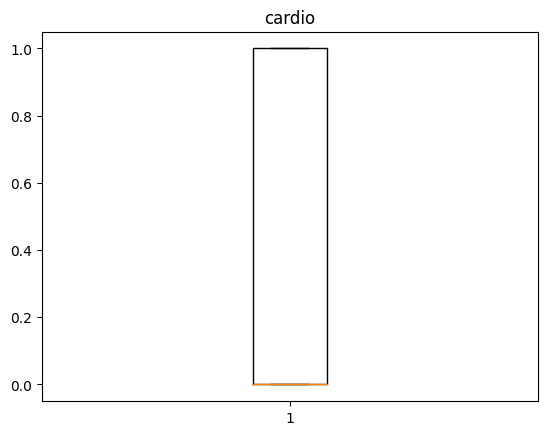

In [ ]:
for i in ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

<ipython-input-40-d40a887bb390>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['age'],25,interpolation ='midpoint')
<ipython-input-40-d40a887bb390>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['age'],50,interpolation ='midpoint')
<ipython-input-40-d40a887bb390>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(d

Q1 =  17664.0
Q2 =  19703.0
Q3 =  21327.0
IQR =  3663.0
low_lim =  12169.5
up_lim =  26821.5
Outliers =  [10878 10798 10859 10964]


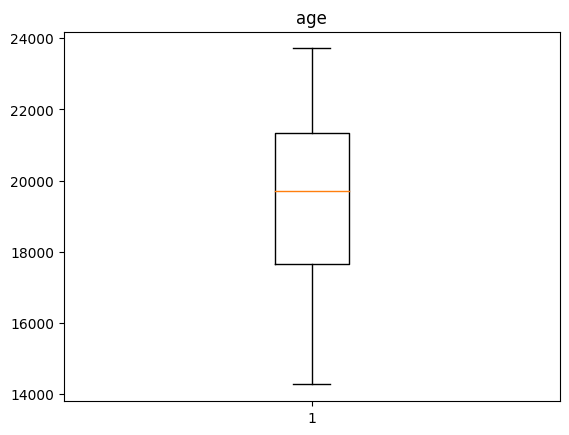

In [ ]:
Q1 = np.percentile(data['age'],25,interpolation ='midpoint')
Q2 = np.percentile(data['age'],50,interpolation ='midpoint')
Q3 = np.percentile(data['age'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['age']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['age'] >= low_lim) & (data['age'] <= up_lim)]

for i in ['age']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-41-7cb18756c575>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['weight'],25,interpolation ='midpoint')
<ipython-input-41-7cb18756c575>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['weight'],50,interpolation ='midpoint')
<ipython-input-41-7cb18756c575>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percen

Q1 =  65.0
Q2 =  72.0
Q3 =  82.0
IQR =  17.0
low_lim =  39.5
up_lim =  107.5
Outliers =  [112. 115. 110. ... 113. 110. 126.]


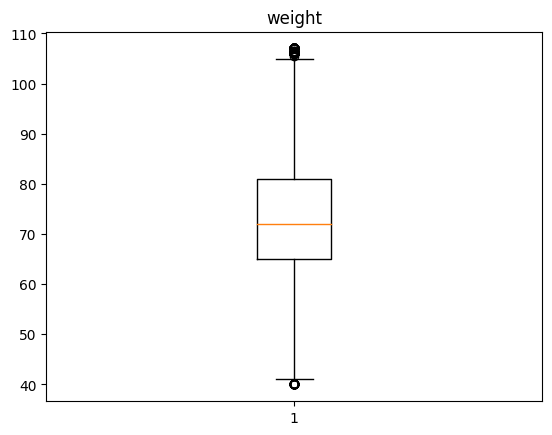

In [ ]:
Q1 = np.percentile(data['weight'],25,interpolation ='midpoint')
Q2 = np.percentile(data['weight'],50,interpolation ='midpoint')
Q3 = np.percentile(data['weight'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['weight']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['weight'] >= low_lim) & (data['weight'] <= up_lim)]

for i in ['weight']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-42-91d399a4f6c7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ap_hi'],25,interpolation ='midpoint')
<ipython-input-42-91d399a4f6c7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ap_hi'],50,interpolation ='midpoint')
<ipython-input-42-91d399a4f6c7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percenti

Q1 =  120.0
Q2 =  120.0
Q3 =  140.0
IQR =  20.0
low_lim =  90.0
up_lim =  170.0
Outliers =  [180 180 190 ... 180 200 180]


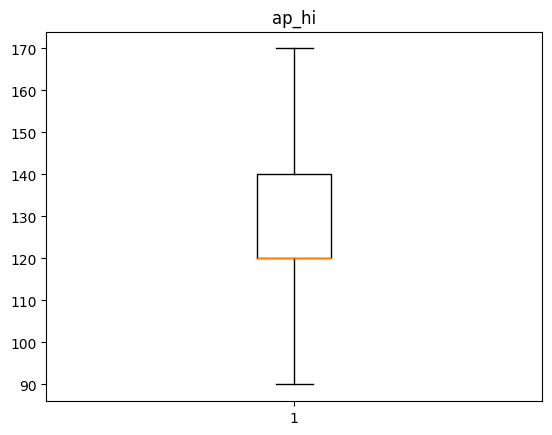

In [ ]:
Q1 = np.percentile(data['ap_hi'],25,interpolation ='midpoint')
Q2 = np.percentile(data['ap_hi'],50,interpolation ='midpoint')
Q3 = np.percentile(data['ap_hi'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['ap_hi']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['ap_hi'] >= low_lim) & (data['ap_hi'] <= up_lim)]

for i in ['ap_hi']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-43-e08db87dfc90>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ap_lo'],25,interpolation ='midpoint')
<ipython-input-43-e08db87dfc90>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ap_lo'],50,interpolation ='midpoint')
<ipython-input-43-e08db87dfc90>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percenti

Q1 =  80.0
Q2 =  80.0
Q3 =  90.0
IQR =  10.0
low_lim =  65.0
up_lim =  105.0
Outliers =  [  60   60   60 ...   60 1000   60]


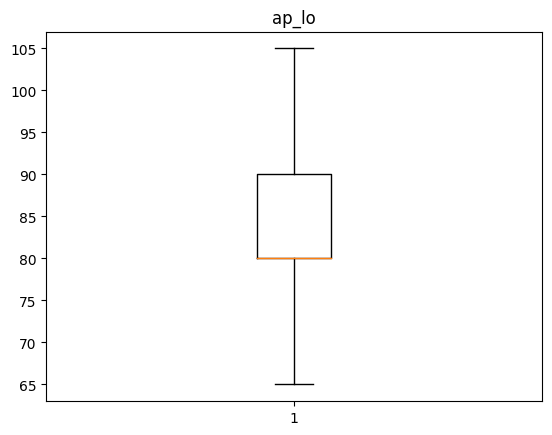

In [ ]:
Q1 = np.percentile(data['ap_lo'],25,interpolation ='midpoint')
Q2 = np.percentile(data['ap_lo'],50,interpolation ='midpoint')
Q3 = np.percentile(data['ap_lo'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['ap_lo']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['ap_lo'] >= low_lim) & (data['ap_lo'] <= up_lim)]

for i in ['ap_lo']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

<ipython-input-44-fa13019ab36f>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['height'],25,interpolation ='midpoint')
<ipython-input-44-fa13019ab36f>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['height'],50,interpolation ='midpoint')
<ipython-input-44-fa13019ab36f>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percen

Q1 =  159.0
Q2 =  165.0
Q3 =  170.0
IQR =  11.0
low_lim =  142.5
up_lim =  186.5
Outliers =  [188  76 142 141 140 198 187 196 138 187 142 194 190 134 140 136 198 187
 100 190 190 120 187 120 189 189 187 194 189 196 190 140 189 188 187 137
 192 187 196 141 250 187 190 120 189 142 140 117 120 190 119 137 198 142
 120 130 192 136 140 130 190 187 120 110 193 187 190 198 187 187 191 188
 187 132 138 188 138  71 190 130 188 138 120 135 140  67 142 189 189 142
  70 190 187 189 196 133  74 190 189 100 137 187 190 189 192 187 141 140
 133 190 188 141 187 120 190 130 141 189 207 192 140 141 189 140 188  55
 120 140 190 120 192 188 188 188 187 133 120 142 187 193 120 141 188 190
 141 140 189 189 188 135 140 187  64 187 192 195 142 130  91 140 110 136
 187 187 198  60 189 187 140 109 140 140 198 198 130 187 120 140 136 188
 188 140 142 125 188 138 187 190 189 139  72 140 187 187 197 130 191 189
 142 193 187 187 135  65 190 188 187 187 142 138 130 140 110 188 140 142
 189 130 137 140 142 142 190 18

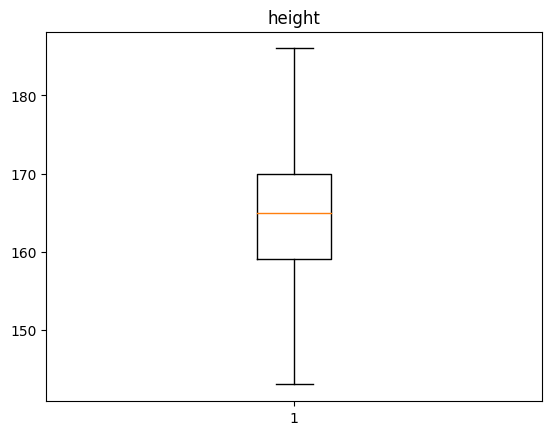

In [ ]:
Q1 = np.percentile(data['height'],25,interpolation ='midpoint')
Q2 = np.percentile(data['height'],50,interpolation ='midpoint')
Q3 = np.percentile(data['height'],75,interpolation ='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_lim = ',low_lim)
print('up_lim = ',up_lim)

outlier=[]
for x in data['height']:
   if((x> up_lim) or (x < low_lim)):
       outlier.append(x)
print('Outliers = ',np.array(outlier))

data = data[(data['height'] >= low_lim) & (data['height'] <= up_lim)]

for i in ['height']:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,0,156,85.0,140,90,2,1,0,0,0,1
2,2,18857,0,165,64.0,130,70,2,1,0,0,1,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,0,1
5,8,21914,0,151,67.0,120,80,0,0,0,0,1,0


In [ ]:
data=data.drop(['id'],axis=1)

In [ ]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,1,168,62.0,110,80,1,1,0,0,0,0
1,20228,0,156,85.0,140,90,2,1,0,0,0,1
2,18857,0,165,64.0,130,70,2,1,0,0,1,1
3,17623,1,169,82.0,150,100,1,1,0,0,0,1
5,21914,0,151,67.0,120,80,0,0,0,0,1,0


**Random Forest**

In [ ]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
model_2 = rf_clf.fit(X_train,y_train)
prediction_2 = model_2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error is:',mean_squared_error(y_test,prediction_2))
print('R squared value is:',r2_score(y_test,prediction_2))

Mean squared error is: 0.28861691064714823
R squared value is: -0.15473158862483238


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy:',accuracy_score(y_test,prediction_2))
print(confusion_matrix(y_test,prediction_2))

Accuracy: 0.7113830893528518
[[4641 1704]
 [1904 4252]]


**Descision Tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
model_1 = dt_clf.fit(X_train,y_train)
prediction_1 = model_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error is:',mean_squared_error(y_test,prediction_1))
print('R squared value is:',r2_score(y_test,prediction_1))

Mean squared error is: 0.3650107991360691
R squared value is: -0.4603770063456514


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,prediction_1))
print(confusion_matrix(y_test,prediction_1))

Accuracy is: 0.6349892008639308
[[4032 2313]
 [2250 3906]]


**Lenear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

Mean squared error is: 0.19217941201479005
R squared value is: 0.23110659995896743


**KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Define a range of k values to test
k_values = range(1, 50)  # Test k values from 1 to 50                  #44

# Create an empty list to store the cross-validation scores
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # Perform 5-fold cross-validation
    cv_scores.append(np.mean(scores))

In [ ]:
# Print the cross-validation scores for each k value
for k, score in zip(k_values, cv_scores):
    print("K =", k, "  Cross-Validation Score =", score)

K = 1   Cross-Validation Score = 0.618927703229677
K = 2   Cross-Validation Score = 0.624747601239876
K = 3   Cross-Validation Score = 0.6538269953004698
K = 4   Cross-Validation Score = 0.6585068653134687
K = 5   Cross-Validation Score = 0.6714466273372662
K = 6   Cross-Validation Score = 0.6737665373462653
K = 7   Cross-Validation Score = 0.679986397360264
K = 8   Cross-Validation Score = 0.6824863633636638
K = 9   Cross-Validation Score = 0.685646305369463
K = 10   Cross-Validation Score = 0.6881262353764624
K = 11   Cross-Validation Score = 0.6906261593840616
K = 12   Cross-Validation Score = 0.692246183381662
K = 13   Cross-Validation Score = 0.6939461693830616
K = 14   Cross-Validation Score = 0.6940461533846615
K = 15   Cross-Validation Score = 0.6944860733926607
K = 16   Cross-Validation Score = 0.6969660353964604
K = 17   Cross-Validation Score = 0.6967660513948606
K = 18   Cross-Validation Score = 0.69822601139886
K = 19   Cross-Validation Score = 0.6987860313968602
K = 20   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
k = 44  # Set the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
model_5 = knn.fit(X_train, y_train)
prediction_5 = model_5.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction_5)
print('Accuracy:', accuracy)

Accuracy: 0.7061035117190625


In [ ]:
print(confusion_matrix(y_test,prediction_5))

[[5010 1335]
 [2339 3817]]


**HYPERPARAMETER TUNING**

**RANDOM FOREST**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
          'min_samples_split': [2, 4, 6]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform random search cross-validation
random_search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Random Search Best Hyperparameters: ", random_search.best_params_)
print("Random Search Best Score: ", random_search.best_score_)


Random Search Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 10}
Random Search Best Score:  0.7343392857142856


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 5, 10],
  'min_samples_split': [2, 4, 6]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Grid Search Best Hyperparameters: ", grid_search.best_params_)
print("Grid Search Best Score: ", grid_search.best_score_)

Grid Search Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}
Grid Search Best Score:  0.7303615518448155


**KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': range(1, 21),  
    'p': [1, 2]  # Possible values for p (1 = Manhattan distance, 2 = Euclidean distance)
}

knn = KNeighborsClassifier()


random_search = RandomizedSearchCV(knn, param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)


print("Random Search Best Hyperparameters: ", random_search.best_params_)
print("Random Search Best Score: ", random_search.best_score_)



Random Search Best Hyperparameters:  {'p': 1, 'n_neighbors': 20}
Random Search Best Score:  0.6998039156084391


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'p': [1, 2]  # Possible values for p (1 = Manhattan distance, 2 = Euclidean distance)
}


knn = KNeighborsClassifier()



# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Grid Search Best Hyperparameters: ", grid_search.best_params_)
print("Grid Search Best Score: ", grid_search.best_score_)



Grid Search Best Hyperparameters:  {'n_neighbors': 19, 'p': 1}
Grid Search Best Score:  0.700763795620438


**DESCISION TREE**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 4, 6 ,8],  # Minimum number of samples required to split an internal node
}


dt = DecisionTreeClassifier()



# Perform random search cross-validation
random_search = RandomizedSearchCV(dt, param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Random Search Best Hyperparameters: ", random_search.best_params_)
print("Random Search Best Score: ", random_search.best_score_)



Random Search Best Hyperparameters:  {'min_samples_split': 6, 'max_depth': 5}
Random Search Best Score:  0.7252218538146186


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 4, 6 ,8]  
}


dt = DecisionTreeClassifier()


# Perform grid search cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Grid Search Best Hyperparameters: ", grid_search.best_params_)
print("Grid Search Best Score: ", grid_search.best_score_)



Grid Search Best Hyperparameters:  {'max_depth': 5, 'min_samples_split': 2}
Grid Search Best Score:  0.7252218538146186
